In [1]:
#9/07/024

## Support Vector Machine(SVM):-
It is powerfull Supervised machine learning algorithm used for classification, regression, and outlier detection task. Here are some key aspect of SVM.
#### Objective:-
SVM aims to find the optimal hyperplace in an N-dinentional space (where N is the number of features)that distinctly classifies data points into the diffrerent classes.

#### Advantages :-
Effective in high dimentional spaces. Effective when the number of dimentions is greter than the number of samples. Versatile due to the kernel trick.

#### Disadvantage :- 
Can be memory intensive and computationally expensive , especially with non-linear kernels. Choosing an Apropeiate kernel function can be          challenging. Not directly applicable to multi-class classifiction tasks; usually requires strategies like one vs 

#### Application:-
SVMs widely used in various  field like Bioinformatics,text catogorization, image recognition, and more due to there fliexibility and effectiveness in complex domain.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [20]:
Ie=LabelEncoder()

In [21]:
df["target"]=Ie.fit_transform (df["Species"])

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [25]:
df0=df.iloc[0:50]

In [26]:
df0

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


In [30]:
df1=df.iloc[51:100]
df2=df.iloc[101:150]

In [28]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,1
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,1
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,1
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,1
55,56,5.7,2.8,4.5,1.3,Iris-versicolor,1
56,57,6.3,3.3,4.7,1.6,Iris-versicolor,1
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,1
58,59,6.6,2.9,4.6,1.3,Iris-versicolor,1
59,60,5.2,2.7,3.9,1.4,Iris-versicolor,1
60,61,5.0,2.0,3.5,1.0,Iris-versicolor,1


In [29]:
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2
101,102,5.8,2.7,5.1,1.9,Iris-virginica,2
102,103,7.1,3.0,5.9,2.1,Iris-virginica,2
103,104,6.3,2.9,5.6,1.8,Iris-virginica,2
104,105,6.5,3.0,5.8,2.2,Iris-virginica,2
105,106,7.6,3.0,6.6,2.1,Iris-virginica,2
106,107,4.9,2.5,4.5,1.7,Iris-virginica,2
107,108,7.3,2.9,6.3,1.8,Iris-virginica,2
108,109,6.7,2.5,5.8,1.8,Iris-virginica,2
109,110,7.2,3.6,6.1,2.5,Iris-virginica,2


<Figure size 640x480 with 0 Axes>

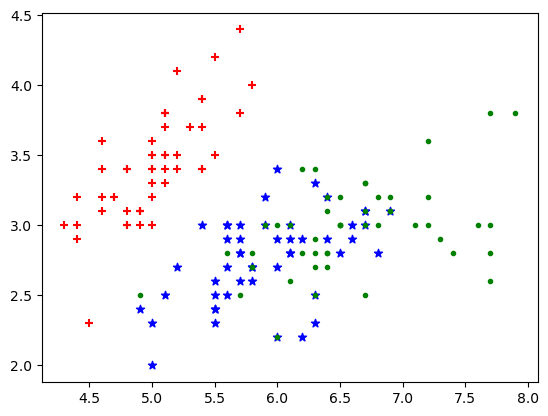

<Figure size 640x480 with 0 Axes>

In [32]:
plt.scatter(df0["SepalLengthCm"],df0["SepalWidthCm"],color='red',marker='+')
plt.scatter(df1["SepalLengthCm"],df1["SepalWidthCm"],color='blue',marker='*')
plt.scatter(df2["SepalLengthCm"],df2["SepalWidthCm"],color='green',marker='.')
plt.figure("figsize=20")

In [33]:
x=df.drop(["Id","Species","target"],axis=1)

In [34]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y=df["target"]

In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
len(x_train)

120

In [40]:
len(y_train)

120

In [42]:
from sklearn.svm import SVC

In [43]:
model=SVC()

In [44]:
model.fit(x_train,y_train)

SVC()

In [45]:
model.score(x_test,y_test)

0.9666666666666667

In [47]:
model.predict([['4.9','3.0','1.4','0.2']])

array([0])

In [49]:
model_c=SVC(C=10)
model_c.fit(x_train,y_train)

SVC(C=10)